#  Stroke Prediction

## I-Data Definitions


| Feature            | Description                                                                                                                                                       |
|--------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                 | Unique identifier for each individual.                                                                                                                           |
| gender             | Gender of the individual                                                                                                             |
| age                | Age of the individual in years.                                                                                                                                  |
| hypertension       | Whether the individual has hypertension                                                                                                      |
| heart_disease      | Whether the individual has heart disease                                                                                                     |
| ever_married       | Marital status of the individual                                                                                                                     |
| work_type          | Type of work the individual is engaged in                                                    |
| Residence_type     | Type of residence of the individual                                                                                                              |
| avg_glucose_level  | Average glucose level in the individual's blood.                                                                                                                  |
| bmi                | Body mass index (BMI) of the individual.                                                                                                                          |
| smoking_status     | Smoking status of the individual                                                                          |
| stroke             | Whether the individual had a stroke                                                                                                        |


## II- Data Preprocessing

In [91]:
import numpy as np
import pandas as pd
from IPython.display import display
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistical libraries
from scipy import stats

# Data preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# Featues/Hyperparameters selection libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import mutual_info_regression
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
# Machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso ,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

######                                              ############
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


# Evaluation metrics libraries
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error, r2_score, matthews_corrcoef
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

# Synthetic dataset library
from sklearn.datasets import make_classification

# For model saving for deployment
import pickle


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [92]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [93]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv',low_memory=False)

### Describing Data

In [94]:
data.shape

(5110, 12)

In [95]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [96]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [97]:
print("-----------------------UNIQUE VALUES FOR EACH COLUMN----------------------------")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(unique_values)
    print()
print("--------------------------------------------------------------------------")

-----------------------UNIQUE VALUES FOR EACH COLUMN----------------------------
Column: id
[ 9046 51676 31112 ... 19723 37544 44679]

Column: gender
['Male' 'Female' 'Other']

Column: age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+0

#### Checking the count of 'other' in gender

In [98]:
data['gender'].value_counts()['Other']

1

> Since it's only 1 'other' in data, we can change it with the mode of that feature

In [99]:
mode = data['gender'].mode().loc[0]
data['gender'] = data['gender'].replace('Other', mode)
mode

'Female'

#### Checking the count of 'unkown' in smoking_status

In [100]:
data['smoking_status'].value_counts()['Unknown']

1544

> Since 1544 unknown (wrt 5110 data rows) it's a huge ratio so for now, we won't substitute this value as to not affect our dataset, we will keep it as first trial/assumption

#### Checking the count of '0/1' in stroke column

In [101]:
stroke_counts = data['stroke'].value_counts()
print(stroke_counts)

stroke
0    4861
1     249
Name: count, dtype: int64


#### Checking the count of '0/1' in heart_disease column

In [102]:
heart_disease_counts = data['heart_disease'].value_counts()
print(heart_disease_counts)

heart_disease
0    4834
1     276
Name: count, dtype: int64


In [103]:
hypertension_counts = data['hypertension'].value_counts()
print(hypertension_counts)

hypertension
0    4612
1     498
Name: count, dtype: int64


#### Checking for 'NaN', 'Nan', and 'N/A' values in the 'bmi' column

In [104]:
total_na_values = data['bmi'].isna().sum() + (data['bmi'] == 'NaN').sum() + (data['bmi'] == 'Nan').sum() + (data['bmi'] == 'N/A').sum()
print("Total count of 'NaN', 'Nan', and 'N/A' values in the 'bmi' column is :", total_na_values)

Total count of 'NaN', 'Nan', and 'N/A' values in the 'bmi' column is : 201


#### Checking for 'NaN', 'Nan', and 'N/A' values in the 'avg_glucose_level' column

In [105]:
total_na_values = data['avg_glucose_level'].isna().sum() + (data['avg_glucose_level'] == 'NaN').sum() + (data['avg_glucose_level'] == 'Nan').sum() + (data['avg_glucose_level'] == 'N/A').sum()
print("Total count of 'NaN', 'Nan', and 'N/A' values in the 'avg_glucose_level' column is :", total_na_values)

Total count of 'NaN', 'Nan', and 'N/A' values in the 'avg_glucose_level' column is : 0


#### Checking for 'NaN', 'Nan', and 'N/A' values in the 'age' column

In [106]:
total_na_values = data['age'].isna().sum() + (data['avg_glucose_level'] == 'NaN').sum() + (data['age'] == 'Nan').sum() + (data['age'] == 'N/A').sum()
print("Total count of 'NaN', 'Nan', and 'N/A' values in the 'age' column is :", total_na_values)

Total count of 'NaN', 'Nan', and 'N/A' values in the 'age' column is : 0


#### Descriptive statistics of data

In [107]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### --- Some Observations ---

#### We can observe the following :
 * Min value of age is 0.08 which does not make sense at all! So we will be checking how many age values are below 1 and will be checking if they are really meant to be enfant/children through work_type or this is a mistake in further steps and will apply appropriate preprocessing
 * About 9.75% of individuals have hypertension.
 * Around 5.40% of individuals have heart disease.
 * The average glucose level in the blood ranges from 55.12 to 271.74 mg/dL, with a mean of approximately 106.15 mg/dL.
 * BMI values range from 10.3 to 97.6, with an average BMI of approximately 28.89
 * Approximately 4.87% of individuals have had a stroke

#### -- Checking features with more than 45% missing values --

In [108]:
cols=[]
for col in data.columns:
    if ((data[col].isnull().sum()/len(data))*100) > 45:
        cols.append(col)
print(cols)

[]


#### -- Checking how many age values are < 1 --

In [109]:
count_age_less_than_1 = (data['age'] < 1).sum()
print("Number of age values less than 1:", count_age_less_than_1)

Number of age values less than 1: 43


In [110]:
children_condition = data[(data['age'] < 1) & (data['work_type'] == 'children')]
print("Rows where age is less than 1 and work_type is 'children':")
print(children_condition[['age', 'work_type','bmi']])

non_children_condition = data[(data['age'] < 1) & (data['work_type'] != 'children')]
print("\nRows where age is less than 1 and work_type is not 'children':")
print(non_children_condition[['age', 'work_type','bmi']])


Rows where age is less than 1 and work_type is 'children':
       age work_type   bmi
363   0.64  children  24.9
376   0.88  children  15.5
564   0.32  children  16.2
982   0.88  children  19.2
996   0.24  children  16.3
1093  0.32  children  16.0
1206  0.72  children  23.0
1317  0.80  children  17.5
1600  0.40  children  14.3
1614  0.08  children  14.1
1808  0.64  children  17.3
1975  0.56  children  21.1
1999  0.24  children  18.5
2008  0.56  children  20.7
2012  0.64  children  16.2
2030  0.48  children   NaN
2358  0.88  children  18.9
2481  0.88  children  22.4
2490  0.88  children  23.4
2579  0.32  children  20.8
2630  0.80  children  15.5
2801  0.80  children  33.1
2875  0.64  children  17.3
2898  0.24  children  18.6
3251  0.56  children  20.1
3295  0.08  children  16.9
3392  0.24  children  14.2
3440  0.56  children  14.1
3618  0.16  children  17.4
3626  0.80  children  15.1
3859  0.32  children  17.8
3894  0.56  children  18.3
3968  0.16  children  13.0
4007  0.72  children  1

> According to Parents website (where data are medically reviewed by doctors) : <br>
     Average BMI for a 1 year old baby girl is : 17.53 kg/m2 <br>
     Average BMI for a 1 year old baby boy is : 15.82  kg/m2 <br><br>
**Since we know what is the gender, what we will be doing is replacing the nan value by one of the 2 BMIs based on the gender in next steps** <br><br>

Ref : https://www.parents.com/first-year-infant-growth-chart-8546333#:~:text=Average%20Baby%20Length%20(Height),-In%20general%2C%20during&text=At%20one%20year%2C%20boys%20are,29%20inches%20(74%20cm).

####  -- Testing if there are duplicates in the dataset or not --

In [111]:
print (data.duplicated().sum())

0


### Classifying 'BMI' feature to 4 values : Underweight, Normal weight, Overweight, and Obese

>The interpretation of BMI categories varies based on guidelines from organizations such as the World Health Organization (WHO) or the Centers for Disease Control and Prevention (CDC).

        According to the WHO:
            - BMI < 18.5: Underweight
            - BMI 18.5 - 24.9: Normal weight
            - BMI 25.0 - 29.9: Overweight
            - BMI ≥ 30.0: Obese
> BUT , BMI (Body Mass Index) ranges for children are typically classified based on percentiles, which compare a child's BMI to the BMI distribution of children of the same age and gender. The percentile ranges commonly used to classify BMI for children are based on growth charts provided by reputable health organizations such as the World Health Organization (WHO) or the Centers for Disease Control and Prevention (CDC).<br> <br>
*Here are the general BMI percentile ranges commonly used for children*: <br><br>
**Underweight:** <br>
BMI less than the 5th percentile for age and gender.<br>
Children in this range may be considered underweight compared to other children of the same age and gender.<br><br>
**Healthy Weight:**<br>
BMI between the 5th and 85th percentiles for age and gender.<br>
Children in this range are generally considered to have a healthy weight for their age and gender.<br><br>
**Overweight:** <br>
BMI between the 85th and 95th percentiles for age and gender.<br>
Children in this range may be considered overweight compared to other children of the same age and gender.<br><br>
**Obese:**<br>
BMI at or above the 95th percentile for age and gender.<br>
Children in this range may be considered obese compared to other children of the same age and gender.<br><br>
As an approximation , for each graph in the following image provided by WHO (https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/bmi-for-age-(5-19-years)/bmifa-girls-z-5-19-labels.pdf?sfvrsn=94b20617_4 and https://cdn.who.int/media/docs/default-source/child-growth/growth-reference-5-19-years/bmi-for-age-(5-19-years)/bmifa-boys-z-5-19-labels.pdf?sfvrsn=5775aced_4 ) we will get the average between the min and max for ages ranging between 5-19 years old . And upon that we will categeroize the bmi to kids/teenagers : <br><br>

* For girls :
            - BMI < 14.74 : Underweight <br>
            - BMI 14.74 - 18.35 : Normal weight <br>
            - BMI 18.35 - 20.99 : Overweight <br>
            - BMI ≥ 20.99: Obese <br>
* For boys :
            - BMI < 15.25 : Underweight <br>
            - BMI 15.25 - 18.75 : Normal weight <br>
            - BMI 18.75 - 21.12 : Overweight <br>
            - BMI ≥ 21.12 : Obese <br>

**Note: THIS IS A PURE SIMPLE APPROXIMATION TO CATEGORIZE OUR DATA , OF COURSE IT'S NOT ACCURATE 100%**

In [112]:
# This function will be used later
def classify_bmi(age, bmi,gender):
    if age > 19:
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25.0:
            return 'Normal weight'
        elif 25.0 <= bmi < 30.0:
            return 'Overweight'
        else:
            return 'Obese'
    else:
        if gender =='Female':
            if bmi < 14.74:
                return 'Underweight'
            elif 14.74 <= bmi < 18.35:
                return 'Normal weight'
            elif 18.35 <= bmi < 20.99:
                return 'Overweight'
            else:
                return 'Obese'
        else :
            if bmi < 15.25:
                return 'Underweight'
            elif 15.25 <= bmi < 18.75:
                return 'Normal weight'
            elif 18.75 <= bmi < 21.12:
                return 'Overweight'
            else:
                return 'Obese'

>##### Since "Id" column is useless in our prediction we can remove it

In [113]:
data.drop('id',axis=1,inplace=True)

### A - Numerical and categorical features identification

#### Categorical Features

In [114]:
cat = [col for col in data.columns if data[col].dtype=="object"]
cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

#### Numerical Features

In [115]:
num = [col for col in data.columns if data[col].dtype=="int64" or data[col].dtype=="float64"]
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

> ##### We can notice that there are many categorical features present in the numerical distribution this is because they were labelled before for simplicity (i.e Gender) . We will be transforming these features into categorical features .

In [116]:
cat.extend(['heart_disease', 'stroke', 'hypertension'])
num.remove('heart_disease')
num.remove('stroke')
num.remove('hypertension')

In [117]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### B- Null Values Handling

In [118]:
nan_percentage = (data.isna().sum() / len(data)) * 100
nan_percentage_df = pd.DataFrame({'Column': nan_percentage.index, 'NaN Percentage': nan_percentage.values})
print(nan_percentage_df)

               Column  NaN Percentage
0              gender        0.000000
1                 age        0.000000
2        hypertension        0.000000
3       heart_disease        0.000000
4        ever_married        0.000000
5           work_type        0.000000
6      Residence_type        0.000000
7   avg_glucose_level        0.000000
8                 bmi        3.933464
9      smoking_status        0.000000
10             stroke        0.000000


 > **We will be replacing these nan values of children based on the age corresponding to each bmi value and then categorize in its corresponding value in bmi_classification . For other nan values, we will replace by the median**

In [119]:
#Apply median only here
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(data[['bmi']])
imputed = imp_median.transform(data[['bmi']])

for index, row in data.iterrows():
    if pd.isna(row['bmi']):
        if row['age'] < 19:
            data.at[index, 'bmi'] = 17.3
        else:
            data.at[index, 'bmi'] = imputed[index][0]

# Applying classification based on the updated 'bmi' values
data['bmi_classification'] = data.apply(lambda row: classify_bmi(row['age'], row['bmi'],row['gender']), axis=1)

In [120]:
data.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                   0
smoking_status        0
stroke                0
bmi_classification    0
dtype: int64

In [121]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight


> **Categorical features do not have nan values after checking in previous steps**

### C- Outliers

> **We will use the IQR and Z-score method and try different approaches using them for different models . We mean that we will make varieties of datasets with different pre-processing approaches**

#### 1) IQR

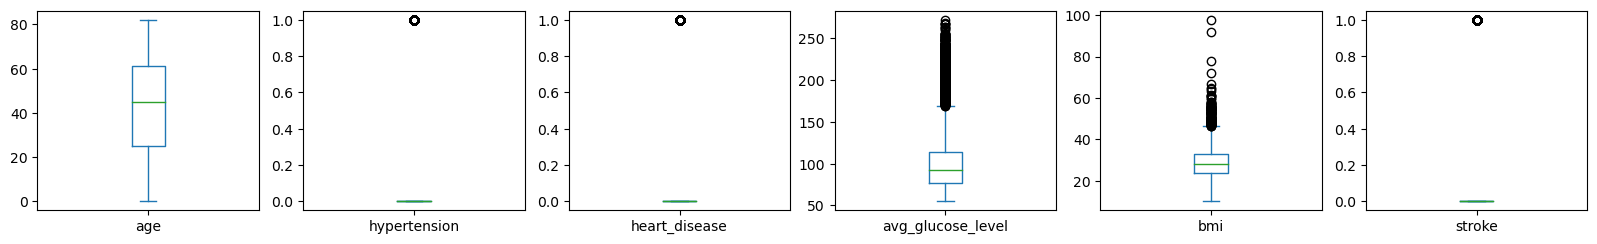

In [122]:
data.plot(kind='box', subplots=True, layout=(5,6), figsize=(20,15))
plt.show()

In [123]:
# IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers

# calculating the percentage of outliers in each numerical column
iqr_out_indx_DF = pd.DataFrame()
columns = data.select_dtypes(include=['number']).drop('hypertension',axis=1).drop('heart_disease',axis=1).drop('stroke',axis=1)
for column in columns:
    outliers = detect_outliers_iqr(data[column])
    iqr_out_indx_DF[column] = outliers
    percentage = len(outliers[outliers == True]) / len(data[column]) * 100
    print(f"{column}: {percentage:.2f}% outliers")

iqr_out_indx_DF = iqr_out_indx_DF.any(axis=1)
percentage = len(iqr_out_indx_DF[iqr_out_indx_DF == True]) / len(data[column]) * 100
print(f"Total: {percentage:.2f}% outliers")

age: 0.00% outliers
avg_glucose_level: 12.27% outliers
bmi: 2.41% outliers
Total: 14.01% outliers


> - *From the box plot we can observe that hypertension , heart_disease and stroke's box plots are all compressed at zero which is normal as we observed in the descriptive analysis table where the IQR is set to zero for all of them. Hence , the outlier at 1 is normal and we will not remove it.* <br>
> - *Regarding the avg_glucose_level , we opted for using 2 measures of outlier detection since deleting 14% of our total dataset seemed too much and unreasonable, as we also found that a person having an average_glucose_level > 200 is reasonable so deleting or substituting outliers in this case would lead in loss of important information. That's why we will focus more on the Z-Score outlier detection cleaned dataset moving forward*

In [124]:
iqrC_data = data[~iqr_out_indx_DF]
print("-------------IQR Cleaned Data-------------")
print("Length: ",len(iqrC_data))
iqrC_data.head()

-------------IQR Cleaned Data-------------
Length:  4394


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1,Overweight
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1,Normal weight
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.1,Unknown,1,Overweight
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1,Normal weight


#### 2) Z-Score

In [125]:
# Z-Score
def detect_outliers_zscore(column):
    colmean =  column.mean()
    colstd = column.std(ddof=0)
    DFZ = ((column - colmean)/colstd).copy()
    outliers = ((DFZ < -3) | (DFZ > 3))
    return outliers

zscore_out_indx_DF = pd.DataFrame()
columns = data.select_dtypes(include=['number']).drop('hypertension',axis=1).drop('heart_disease',axis=1).drop('stroke',axis=1)
for column in columns:
    outliers = detect_outliers_zscore(data[column])
    zscore_out_indx_DF[column] = outliers
    percentage = len(outliers[outliers == True]) / len(data[column]) * 100
    print(f"{column}: {percentage:.2f}% outliers")

zscore_out_indx_DF = zscore_out_indx_DF.any(axis=1)
percentage = len(zscore_out_indx_DF[zscore_out_indx_DF == True]) / len(data[column]) * 100
print(f"Total: {percentage:.2f}% outliers")

age: 0.00% outliers
avg_glucose_level: 0.96% outliers
bmi: 1.15% outliers
Total: 2.11% outliers


> **We can notice that with Z-score there are much less outliers percentages than IQR method , so will be using Z-score as our dataset is small we do not need to drop a lot of rows**

In [126]:
ZscoreC_data = data[~zscore_out_indx_DF]
print("-------------Zscore Cleaned Data-------------")
print("LENTH : " , len(ZscoreC_data))
ZscoreC_data.head()

-------------Zscore Cleaned Data-------------
LENTH :  5002


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight


### D- Data Visualization and Insights

#### 1-Univariate Analysis

##### Categorical Features

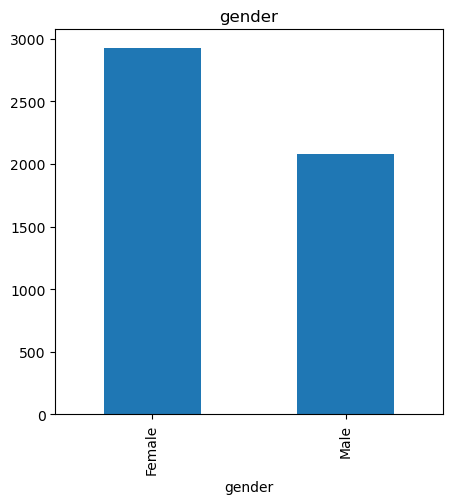

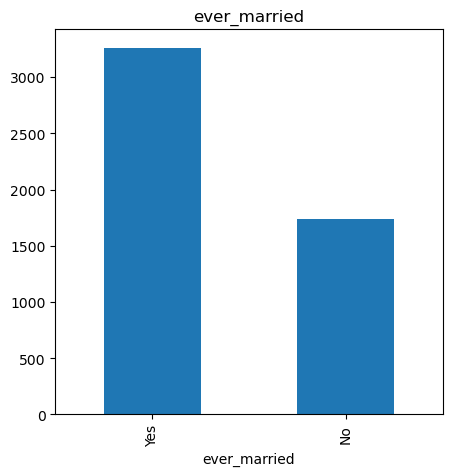

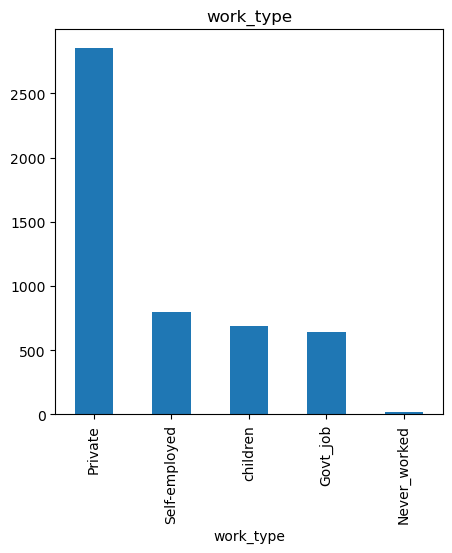

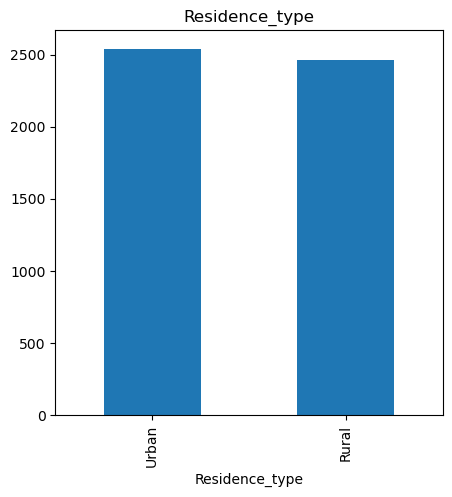

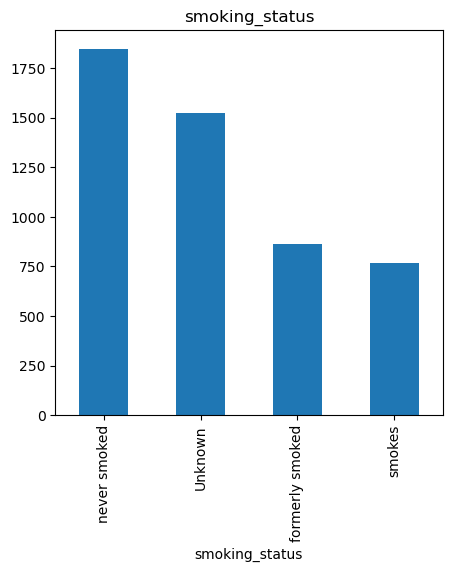

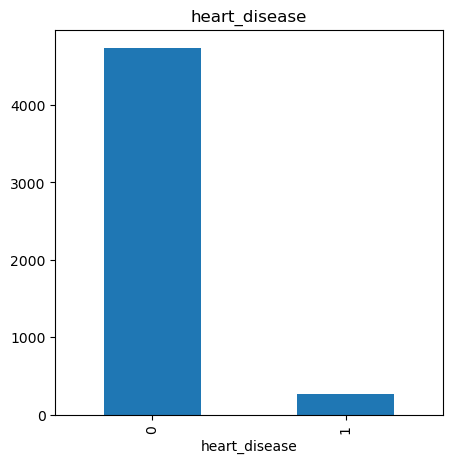

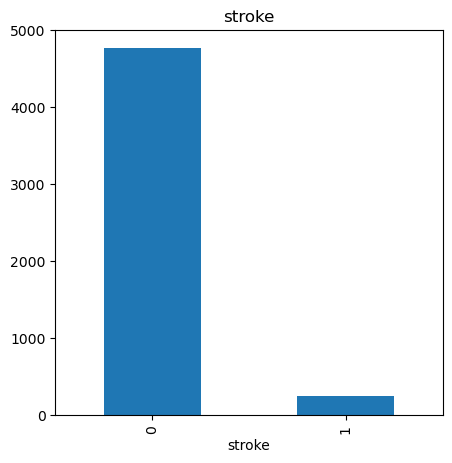

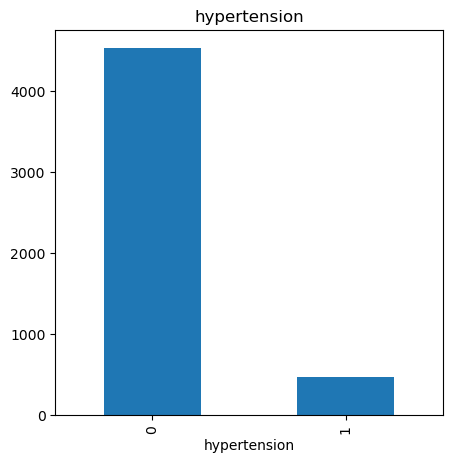

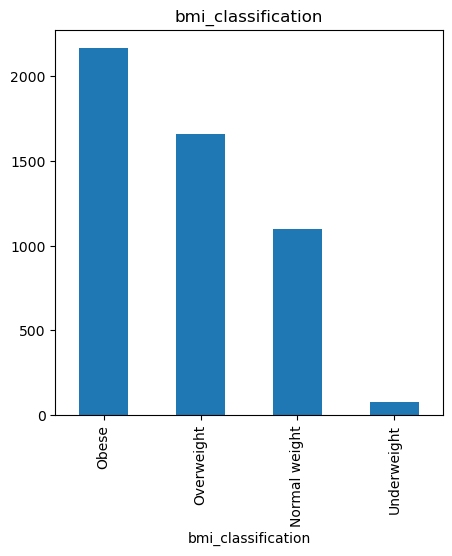

In [127]:
cat.append("bmi_classification")
for column in cat :
    ZscoreC_data[column].value_counts().plot(kind='bar' ,layout=(4,2),figsize=(5,5))
    plt.title(column)
    plt.show()

* The dataset has slightly more females and people that were married before than males and people who were never married respectively
> * <b> The major issue with this dataset that we aim to fix is that it is one sided towards people that don't have a stroke, heart diseases or hypertension. </b>

In [128]:
work_types = dict(ZscoreC_data['work_type'].value_counts())
fig = px.pie(names = work_types.keys(),values = work_types.values(),title = 'Work Profile')
fig.update_traces(textposition='inside', textinfo='percent+label')

In [129]:
stroke = dict(ZscoreC_data['stroke'].value_counts())
fig = px.pie(names = stroke.keys(),values = stroke.values(),title = 'Stroke ratio')
fig.update_traces(textposition='inside', textinfo='percent+label')

##### Numerical Features

###### - Plotting the distribution

In [130]:
def check_skewness(feature):
    if feature.mean() == feature.median():
        return "NO skewness"
    elif feature.mean() > feature.median():
        return "LEFT skewness"
    else:
        return "RIGHT skewness"

> This function checks whether the feture has skewness and to which direction

age - mean:42.985405837664935, median:44.0 -- RIGHT skewness
avg_glucose_level - mean:104.53382047181127, median:91.57499999999999 -- LEFT skewness
bmi - mean:28.445281887245105, median:28.1 -- LEFT skewness


c:\Users\mnagu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\mnagu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

c:\Users\mnagu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



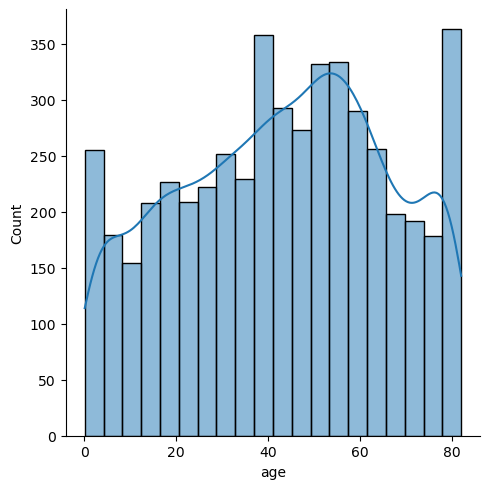

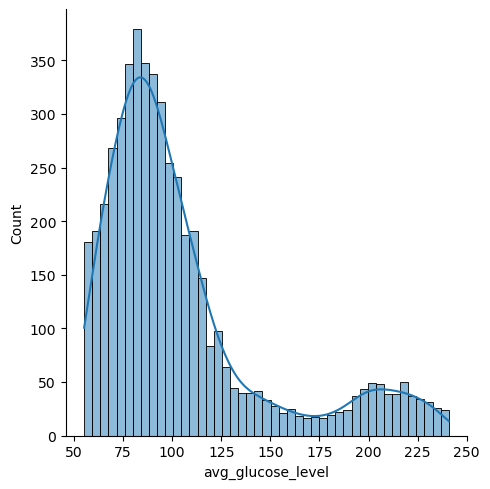

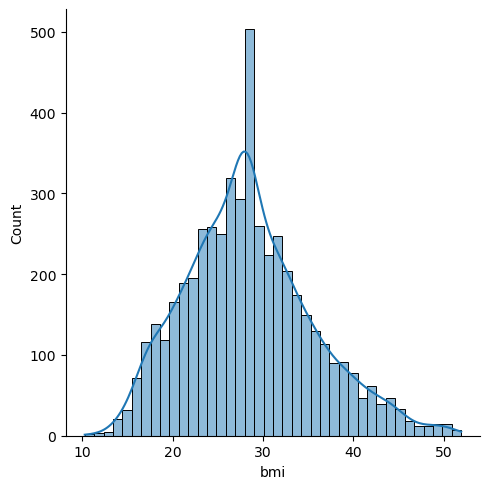

In [131]:
plt.rcParams['figure.max_open_warning'] = 25
for feature in num:
    print(f"{feature} - mean:{ZscoreC_data[feature].mean()}, median:{ZscoreC_data[feature].median()} -- {check_skewness(ZscoreC_data[feature])}")
    sns.displot(ZscoreC_data[feature], kde=True)

###### - Statistical analysis

In [132]:
num = [col for col in data.columns if ZscoreC_data[col].dtype=="int64" or ZscoreC_data[col].dtype=="float64"]
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [133]:
ZscoreC_data[num].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000,5002.000000
mean,42.985406,0.093762,0.053179,104.533820,28.445282,0.047781
std,22.665545,0.291527,0.224412,42.892413,7.034930,0.213324
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.072500,23.600000,0.000000
50%,44.000000,0.000000,0.000000,91.575000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,112.960000,32.500000,0.000000
max,82.000000,1.000000,1.000000,240.860000,51.900000,1.000000


#### 2-Bivariate Analysis

#### Point-biserial correlation

###### A side note : Point-biserial correlation and Pearson correaltion will always give the same result .

In [134]:
for col in num:
    corr, p_value = stats.pointbiserialr(ZscoreC_data[col],ZscoreC_data['stroke'])
    print("Point-biserial correlation between 'stroke' and", col, "is", corr)

Point-biserial correlation between 'stroke' and age is 0.24382674038793617
Point-biserial correlation between 'stroke' and hypertension is 0.12086660242663705
Point-biserial correlation between 'stroke' and heart_disease is 0.12652056557366362
Point-biserial correlation between 'stroke' and avg_glucose_level is 0.12051705071224503
Point-biserial correlation between 'stroke' and bmi is 0.04146223817151008
Point-biserial correlation between 'stroke' and stroke is 1.0


In [135]:
# Get the numerical columns (excluding categorical columns)
numerical_data = ZscoreC_data.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.277528,0.262957,0.218924,0.365905,0.243827
hypertension,0.277528,1.000000,0.104100,0.160597,0.142405,0.120867
heart_disease,0.262957,0.104100,1.000000,0.158241,0.051659,0.126521
avg_glucose_level,0.218924,0.160597,0.158241,1.000000,0.168487,0.120517
bmi,0.365905,0.142405,0.051659,0.168487,1.000000,0.041462
stroke,0.243827,0.120867,0.126521,0.120517,0.041462,1.000000


* We can notice also that there aren't any feature that is highly correlated with the target variable.

 <br>
-  *Why not dropping them immediately ?* <br>

   Because : <br>
   <br>
      1- Correlation measures the relationship between two variables while holding all other variables constant. However, in real-world datasets, there may be other factors that influence the relationship between features that are not captured by the correlation coefficient. For example, two features may have a weak correlation when all other variables are held constant, but their relationship may become stronger or weaker when other variables are introduced into the analysis.So we have to make sure that these column are correlated with other significant columns to our target variable before dropping them ! (We can use correlation matrix between variables)

      2- We may need these columns for creating new features during our analysis process.<br>
      3- The dataset is too small  <br><br>

* **The only correlation worth mentioning is a medium positive relation between age and bmi with a correlation value of 0.365905**

##### Plotting AGE VS BMI (medium positive correlation)

Text(0, 0.5, 'bmi')

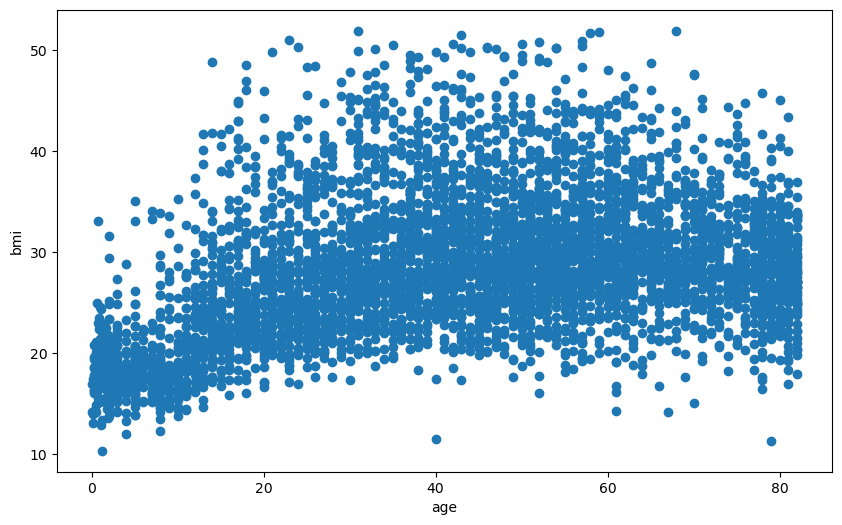

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(ZscoreC_data['age'], ZscoreC_data['bmi'])
plt.xlabel('age')
plt.ylabel('bmi')

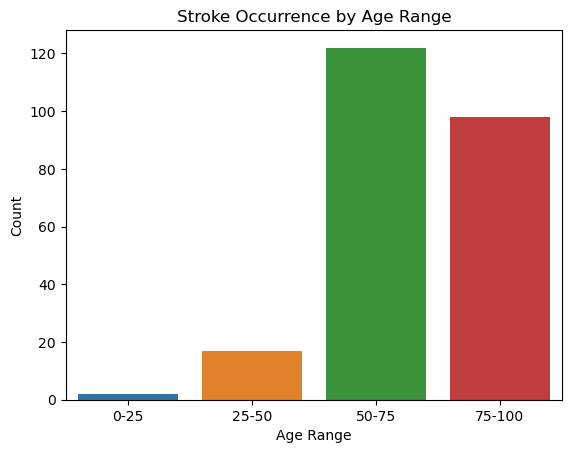

In [137]:
age_ranges = [(0,25),(25,50),(50,75),(75,100)]

stroke_counts = []
no_stroke_counts = []

for age_min, age_max in age_ranges:
    stroke_counts.append(ZscoreC_data[(ZscoreC_data['age'] >= age_min) & (ZscoreC_data['age'] < age_max) & (ZscoreC_data['stroke'] == 1)].shape[0])
    no_stroke_counts.append(ZscoreC_data[(ZscoreC_data['age'] >= age_min) & (ZscoreC_data['age'] < age_max) & (ZscoreC_data['stroke'] == 0)].shape[0])

data_gph = {'Age Range': [f"{min}-{max}" for min, max in age_ranges],
        'Stroke': stroke_counts,
        'No Stroke': no_stroke_counts}
df_counts = pd.DataFrame(data_gph)

sns.barplot(x='Age Range', y='Stroke', data=df_counts)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Stroke Occurrence by Age Range')
plt.show()

#### Chi square test

> In the context of the chi-square test of independence: <br>
> * Null Hypothesis (H0): There is no association between the two categorical variables. <br>
> * Alternative Hypothesis (H1): There is an association between the two categorical variables. <br> <br>
When the p-value is close to 0, it means that the observed frequency distribution of the two variables is significantly different from what would be expected if they were independent. Therefore, we reject the null hypothesis and conclude that there is a statistically significant association between the variables.







<div style="text-align: center;">
    <h4 style="font-size: 17px; font-family: Calibri;">Stroke</h4>
</div>

In [138]:
data_df = pd.DataFrame(ZscoreC_data)
cat_cols = data_df.select_dtypes(include=['object']).columns
target_col = 'stroke'

columns = ['Column', 'Chi-square', 'P-value', 'Conclusion']
results = []

for col in cat_cols:
    contingency_table = pd.crosstab(data_df[target_col], data_df[col])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    conclusion = 'Significant' if p_value < 0.05 else 'Not Significant'
    results.append([col, chi2, p_value, conclusion])

results_df_ = pd.DataFrame(results, columns=columns)
results_df_

,Column,Chi-square,P-value,Conclusion
0,gender,0.030912,8.604379e-01,Not Significant
1,ever_married,55.897209,7.636090e-14,Significant
2,work_type,50.255955,3.192742e-10,Significant
3,Residence_type,1.437055,2.306166e-01,Not Significant
4,smoking_status,26.826536,6.401501e-06,Significant
5,bmi_classification,24.556941,1.911034e-05,Significant


<Axes: xlabel='BMI Classification', ylabel='Stroke'>

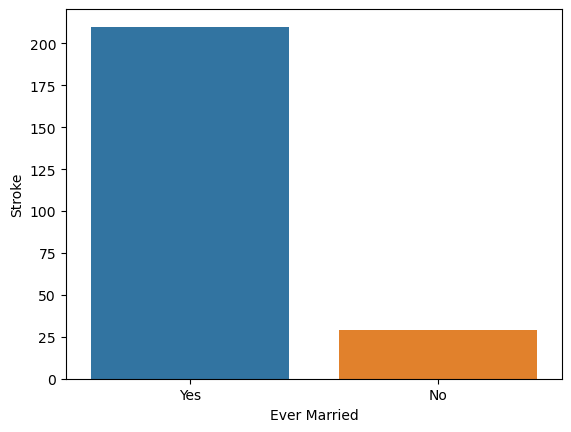

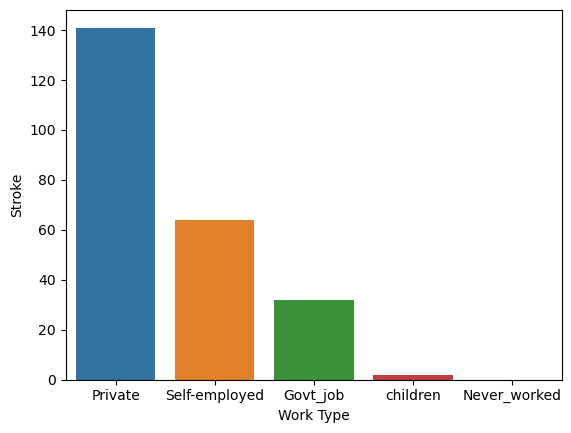

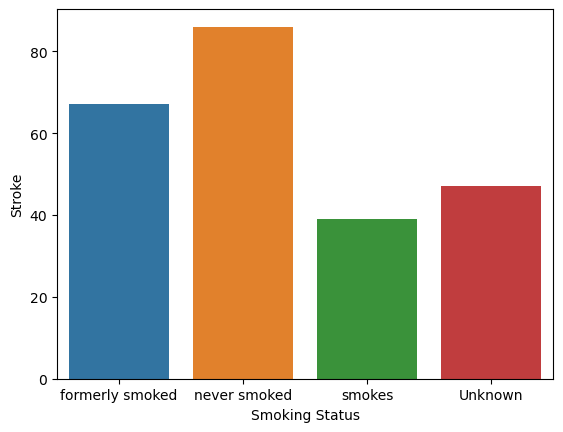

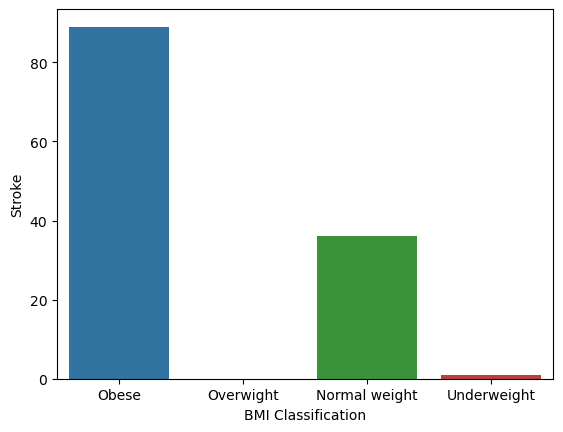

In [139]:
married_stroke_counts = []
married_stroke_counts.append(ZscoreC_data[(ZscoreC_data['ever_married'] == "Yes") & (ZscoreC_data['stroke'] == 1)].shape[0])
married_stroke_counts.append(ZscoreC_data[(ZscoreC_data['ever_married'] == "No") & (ZscoreC_data['stroke'] == 1)].shape[0])
data = {'Ever Married': ["Yes", "No"],
        'Stroke': married_stroke_counts,}
df_counts = pd.DataFrame(data)
plt.figure()
sns.barplot(x='Ever Married', y='Stroke', data=df_counts)

work_stroke_counts = []
work_stroke_counts.append(ZscoreC_data[(ZscoreC_data['work_type'] == "Private") & (ZscoreC_data['stroke'] == 1)].shape[0])
work_stroke_counts.append(ZscoreC_data[(ZscoreC_data['work_type'] == "Self-employed") & (ZscoreC_data['stroke'] == 1)].shape[0])
work_stroke_counts.append(ZscoreC_data[(ZscoreC_data['work_type'] == "Govt_job") & (ZscoreC_data['stroke'] == 1)].shape[0])
work_stroke_counts.append(ZscoreC_data[(ZscoreC_data['work_type'] == "children") & (ZscoreC_data['stroke'] == 1)].shape[0])
work_stroke_counts.append(ZscoreC_data[(ZscoreC_data['work_type'] == "Never_worked") & (ZscoreC_data['stroke'] == 1)].shape[0])
data = {'Work Type': ["Private", "Self-employed", "Govt_job", "children", "Never_worked"],
        'Stroke': work_stroke_counts,}
df_counts = pd.DataFrame(data)
plt.figure()
sns.barplot(x='Work Type', y='Stroke', data=df_counts)

smoke_stroke_counts = []
smoke_stroke_counts.append(ZscoreC_data[(ZscoreC_data['smoking_status'] == "formerly smoked") & (ZscoreC_data['stroke'] == 1)].shape[0])
smoke_stroke_counts.append(ZscoreC_data[(ZscoreC_data['smoking_status'] == "never smoked") & (ZscoreC_data['stroke'] == 1)].shape[0])
smoke_stroke_counts.append(ZscoreC_data[(ZscoreC_data['smoking_status'] == "smokes") & (ZscoreC_data['stroke'] == 1)].shape[0])
smoke_stroke_counts.append(ZscoreC_data[(ZscoreC_data['smoking_status'] == "Unknown") & (ZscoreC_data['stroke'] == 1)].shape[0])
data = {'Smoking Status': ["formerly smoked", "never smoked", "smokes", "Unknown"],
        'Stroke': smoke_stroke_counts,}
df_counts = pd.DataFrame(data)
plt.figure()
sns.barplot(x='Smoking Status', y='Stroke', data=df_counts)

bmi_stroke_counts = []
bmi_stroke_counts.append(ZscoreC_data[(ZscoreC_data['bmi_classification'] == "Obese") & (ZscoreC_data['stroke'] == 1)].shape[0])
bmi_stroke_counts.append(ZscoreC_data[(ZscoreC_data['bmi_classification'] == "Overwight") & (ZscoreC_data['stroke'] == 1)].shape[0])
bmi_stroke_counts.append(ZscoreC_data[(ZscoreC_data['bmi_classification'] == "Normal weight") & (ZscoreC_data['stroke'] == 1)].shape[0])
bmi_stroke_counts.append(ZscoreC_data[(ZscoreC_data['bmi_classification'] == "Underweight") & (ZscoreC_data['stroke'] == 1)].shape[0])
data = {'BMI Classification': ["Obese", "Overwight", "Normal weight", "Underweight"],
        'Stroke': bmi_stroke_counts,}
df_counts = pd.DataFrame(data)
plt.figure()
sns.barplot(x='BMI Classification', y='Stroke', data=df_counts)

### D- Data Encoding and discretization

#### Discretizing age and avg_glucose_level columns

In [140]:
age_ranges = [(0, 25), (25, 50), (50, 75), (75, 100)]

# Function to categorize age into ranges
def categorize_age(age):
    for i, (start, end) in enumerate(age_ranges):
        if start <= age < end:
            return f"Age Range {i+1}: {start}-{end}"
    return "Age Range not specified"


ZscoreC_data.loc[:, 'age_range'] = ZscoreC_data['age'].apply(categorize_age)
iqrC_data.loc[:, 'age_range'] = iqrC_data['age'].apply(categorize_age)

C:\Users\mnagu\AppData\Local\Temp\ipykernel_6740\486047999.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mnagu\AppData\Local\Temp\ipykernel_6740\486047999.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [141]:
# Convert ZscoreC_data to a DataFrame
data_df_Z = pd.DataFrame(ZscoreC_data)

# Defining the bin edges based on percentiles
bin_edges = [data_df_Z['avg_glucose_level'].min(), 77.245, 91.885, 114.090, data_df['avg_glucose_level'].max()]

bin_labels = ['Very Low', 'Low', 'Moderate', 'High']

ZscoreC_data.loc[:, 'avg_glucose_level_categories'] = pd.cut(data_df_Z['avg_glucose_level'], bins=bin_edges, labels=bin_labels)
ZscoreC_data.head()

C:\Users\mnagu\AppData\Local\Temp\ipykernel_6740\3490885702.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification,age_range,avg_glucose_level_categories
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,Age Range 3: 50-75,High
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Age Range 3: 50-75,High
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,Age Range 4: 75-100,Moderate
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese,Age Range 2: 25-50,High
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight,Age Range 4: 75-100,High


In [142]:
data_df_I = pd.DataFrame(iqrC_data)

# Defining the bin edges based on percentiles
bin_edges = [data_df_I['avg_glucose_level'].min(), 77.245, 91.885, 114.090, data_df_I['avg_glucose_level'].max()]

bin_labels = ['Very Low', 'Low', 'Moderate', 'High']

ZscoreC_data.loc[:, 'avg_glucose_level_categories'] = pd.cut(data_df_I['avg_glucose_level'], bins=bin_edges, labels=bin_labels)
ZscoreC_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification,age_range,avg_glucose_level_categories
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obese,Age Range 3: 50-75,NaN
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,Overweight,Age Range 3: 50-75,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obese,Age Range 4: 75-100,Moderate
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obese,Age Range 2: 25-50,NaN
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Normal weight,Age Range 4: 75-100,NaN


#### Applying Label Encoding

In [143]:
#First double checking that all types are of type 'Object'
ZscoreC_data.dtypes

gender                            object
age                              float64
hypertension                       int64
heart_disease                      int64
ever_married                      object
work_type                         object
Residence_type                    object
avg_glucose_level                float64
bmi                              float64
smoking_status                    object
stroke                             int64
bmi_classification                object
age_range                         object
avg_glucose_level_categories    category
dtype: object

In [144]:
#converting
ZscoreC_data = ZscoreC_data.astype('object')

In [145]:
cat_cols = ZscoreC_data.select_dtypes(include=['object']).columns.tolist()
print(cat_cols)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'bmi_classification', 'age_range', 'avg_glucose_level_categories']


In [146]:
for col in cat_cols:
    le = LabelEncoder()
    ZscoreC_data[col] = le.fit_transform(ZscoreC_data[col])

In [147]:
ZscoreC_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_classification,age_range,avg_glucose_level_categories
0,1,88,0,1,1,2,1,3809,239,1,1,1,2,4
1,0,82,0,0,1,3,0,3558,154,2,1,2,2,4
2,1,101,0,1,1,2,0,2463,198,2,1,1,3,2
3,0,70,0,0,1,2,1,3357,217,3,1,1,1,4
4,0,100,1,0,1,3,0,3366,113,2,1,0,3,4


# Phase 2

# Splitting data into X and y

In [148]:
X = ZscoreC_data.drop(columns=["stroke"])
X_rf_dt = ZscoreC_data.drop(columns=["stroke","age","avg_glucose_level","bmi"])
y = ZscoreC_data["stroke"]

# X_rf_dt
#print(X.head())
#print(y)

# Splitting Data into Training and Tests

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_RF_DT_train, X_RF_DT_test, y_RF_DT_train, y_RF_DT_test = train_test_split(X_rf_dt, y, test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_RF_DT_train_scaled = scaler.fit_transform(X_RF_DT_train)
X_RF_DT_test_scaled = scaler.transform(X_RF_DT_test)
# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(sampling_strategy=0.35, k_neighbors=3,random_state=42)
ros = RandomOverSampler(sampling_strategy='minority')
rus = RandomUnderSampler(sampling_strategy='majority')
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
X_RF_DT_train_resampled, y_RF_DT_train_resampled = smote.fit_resample(X_RF_DT_train_scaled, y_RF_DT_train)

# Logistic Regression

Logistic Regression Accuracy: 0.9410589410589411


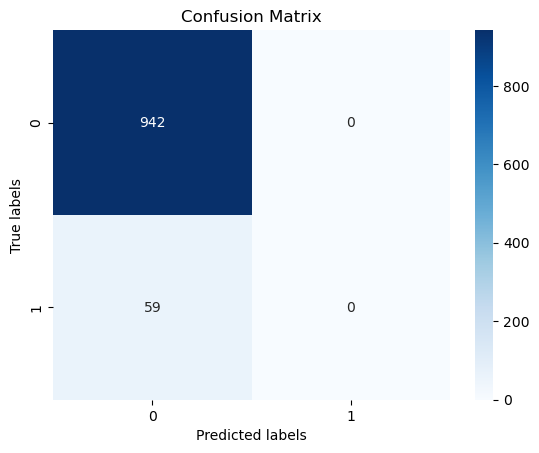

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [150]:
# Unsampled data
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, lr_pred)
print("Classification Report:\n", report)

Logistic Regression Accuracy: 0.8711288711288712


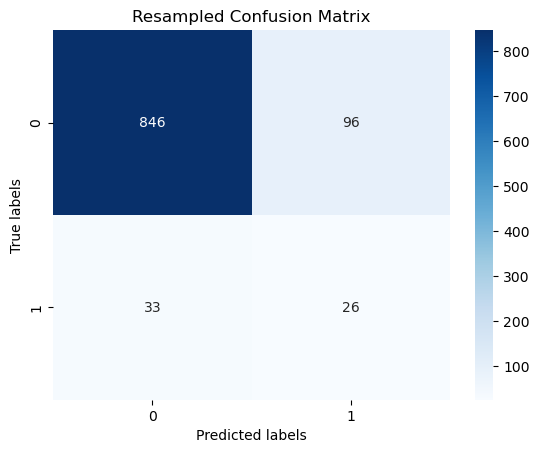

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       942
           1       0.21      0.44      0.29        59

    accuracy                           0.87      1001
   macro avg       0.59      0.67      0.61      1001
weighted avg       0.92      0.87      0.89      1001



In [151]:
# sampled data
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)
lr_pred = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_accuracy)

# Create a confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Resampled Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, lr_pred)
print("Classification Report:\n", report)

# Decision Trees

Decision Trees Accuracy: 0.9250749250749251


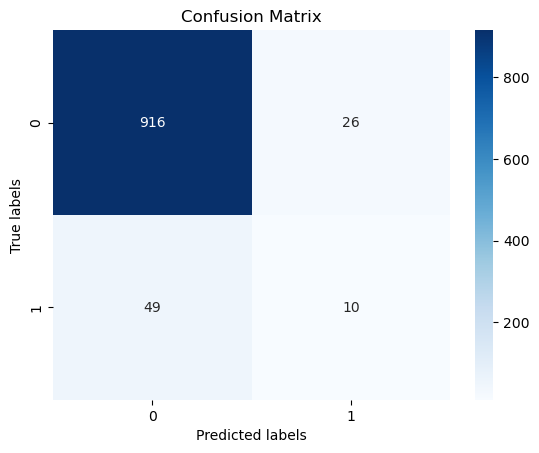

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       942
           1       0.28      0.17      0.21        59

    accuracy                           0.93      1001
   macro avg       0.61      0.57      0.59      1001
weighted avg       0.91      0.93      0.92      1001



In [152]:
dt = DecisionTreeClassifier()
dt.fit(X_RF_DT_train_scaled, y_RF_DT_train)
dt_pred = dt.predict(X_RF_DT_test_scaled)
dt_accuracy = accuracy_score(y_RF_DT_test, dt_pred)
print("Decision Trees Accuracy:", dt_accuracy)
# Create a confusion matrix
cm = confusion_matrix(y_RF_DT_test, dt_pred)


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, dt_pred)
print("Classification Report:\n", report)

Decision Trees Accuracy: 0.926073926073926


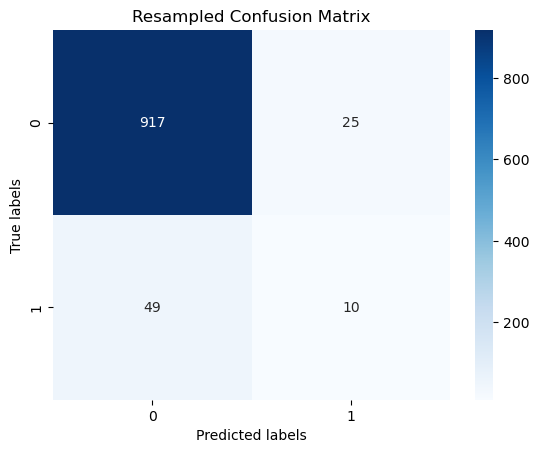

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       942
           1       0.29      0.17      0.21        59

    accuracy                           0.93      1001
   macro avg       0.62      0.57      0.59      1001
weighted avg       0.91      0.93      0.92      1001



In [153]:
dt = DecisionTreeClassifier()
dt.fit(X_RF_DT_train_resampled, y_RF_DT_train_resampled)
dt_pred = dt.predict(X_RF_DT_test_scaled)
dt_accuracy = accuracy_score(y_RF_DT_test, dt_pred)
print("Decision Trees Accuracy:", dt_accuracy)
# Create a confusion matrix
cm = confusion_matrix(y_test, dt_pred)


# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Resampled Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, dt_pred)
print("Classification Report:\n", report)

# Support Vector Machines

Support Vector Machines Accuracy: 0.9410589410589411


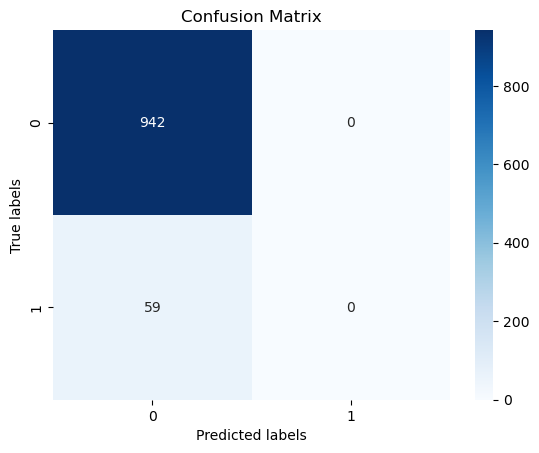

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       942
           1       0.00      0.00      0.00        59

    accuracy                           0.94      1001
   macro avg       0.47      0.50      0.48      1001
weighted avg       0.89      0.94      0.91      1001



c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\mnagu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [154]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machines Accuracy:", svm_accuracy)
# Create a confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, svm_pred)
print("Classification Report:\n", report)

Support Vector Machines Accuracy: 0.8891108891108891


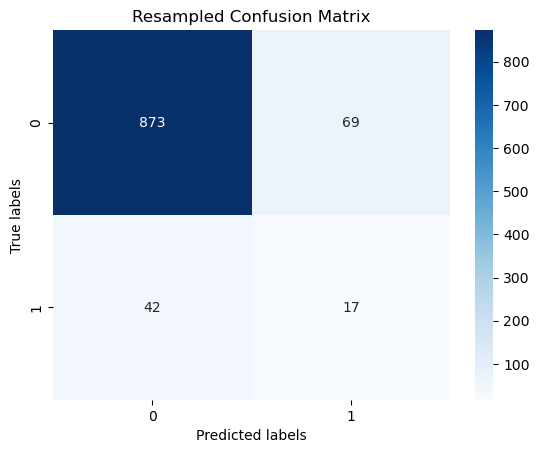

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       942
           1       0.20      0.29      0.23        59

    accuracy                           0.89      1001
   macro avg       0.58      0.61      0.59      1001
weighted avg       0.91      0.89      0.90      1001



In [155]:
svm = SVC()
svm.fit(X_train_resampled, y_train_resampled)
svm_pred = svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machines Accuracy:", svm_accuracy)
# Create a confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Resampled Confusion Matrix')
plt.show()

# Create a classification report
report = classification_report(y_test, svm_pred)
print("Classification Report:\n", report)

# K-means clustering (Unsupervised)

Silhouette Score: 0.18547330101508236


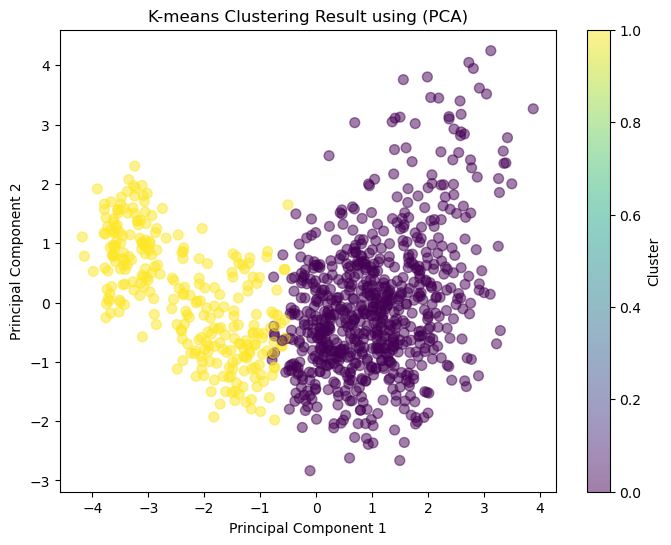

In [156]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)
kmeans_pred = kmeans.predict(X_test_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_test_scaled, kmeans_pred)
print("Silhouette Score:", silhouette_avg)

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Plot the data points with their cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=kmeans_pred, cmap='viridis', s=50, alpha=0.5)
plt.title('K-means Clustering Result using (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

- If the silhouette score is close to 1, it suggests that the clusters are well-separated.
- If the silhouette score is close to 0, it suggests overlapping clusters or clusters that are close to each other.
- If the silhouette score is negative, it suggests that data points might have been assigned to the wrong cluster.

# DBSCAN clustering (Unsupervised)

Silhouette Score: -0.21713373339138986


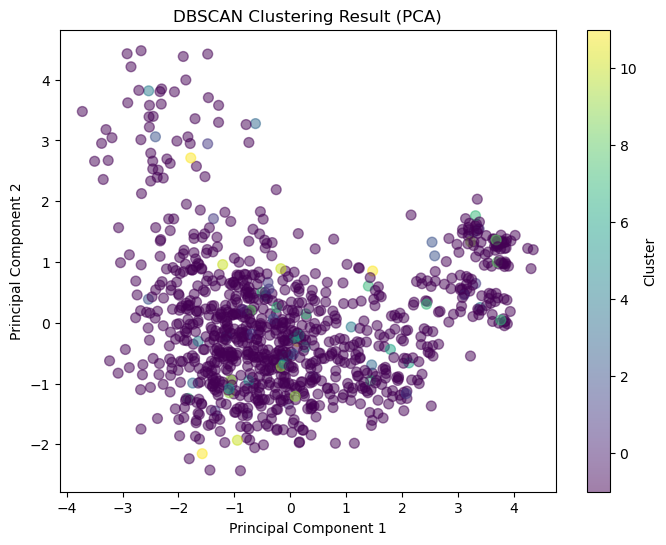

In [157]:
dbscan = DBSCAN(eps=1, min_samples=15)
dbscan.fit(X_train_scaled)
dbscan_pred = dbscan.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_test_scaled, dbscan_pred[:X_test_scaled.shape[0]])
print("Silhouette Score:", silhouette_avg)

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Plot the data points with their cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=dbscan_pred[:X_test_pca.shape[0]], cmap='viridis', s=50, alpha=0.5)
plt.title('DBSCAN Clustering Result (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# K-nearest neighbors (KNN)

In [158]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-nearest Neighbors Accuracy:", knn_accuracy)

K-nearest Neighbors Accuracy: 0.9370629370629371


# Agglomerative Clustering (Hierarchical Clustering)

Silhouette Score: 0.002501957618475444


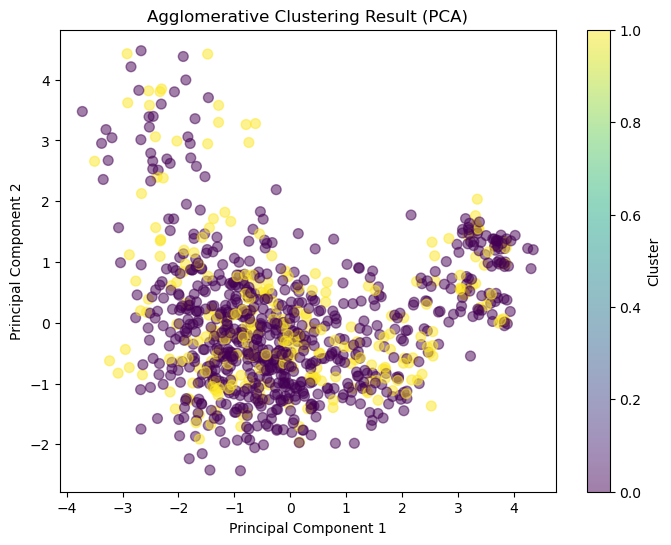

In [159]:
agg = AgglomerativeClustering(n_clusters=2)  # Assuming binary classification
agg.fit(X_train_scaled)
agg_pred = agg.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X_test_scaled, agg_pred[:X_test_scaled.shape[0]])
print("Silhouette Score:", silhouette_avg)

# Apply PCA to reduce the dimensionality of the data to 2 dimensions
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Plot the data points with their cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=agg_pred[:X_test_pca.shape[0]], cmap='viridis', s=50, alpha=0.5)
plt.title('Agglomerative Clustering Result (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Gaussian Naive Bayes Classifier

In [160]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train_scaled, y_train)
nb_pred = nb_classifier.predict(X_test_scaled)

nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.8541458541458542


# MLP classifier

In [161]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp_classifier.fit(X_train_scaled, y_train)
mlp_pred = mlp_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, mlp_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9400599400599401


# Extra Regression Models

In [162]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    if name != "Random Forest Regression" and name != "Decision Tree Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
    else:
        model.fit(X_RF_DT_train_scaled, y_RF_DT_train)
        y_pred = model.predict(X_RF_DT_test_scaled)
        mse = mean_squared_error(y_RF_DT_test, y_pred)
        r2 = r2_score(y_RF_DT_test, y_pred)
    print(f"{name} - MSE: {mse}, R-squared: {r2}")
    print("-----------------------------------------")

Training Linear Regression...
Linear Regression - MSE: 0.051111159371037794, R-squared: 0.07853048326785361
-----------------------------------------
Training Ridge Regression...
Ridge Regression - MSE: 0.05111083493559508, R-squared: 0.07853633242827729
-----------------------------------------
Training Lasso Regression...
Lasso Regression - MSE: 0.05566167735829018, R-squared: -0.003509596867179665
-----------------------------------------
Training ElasticNet Regression...
ElasticNet Regression - MSE: 0.05566167735829018, R-squared: -0.003509596867179665
-----------------------------------------
Training Decision Tree Regression...
Decision Tree Regression - MSE: 0.08355060494507449, R-squared: -0.5063116647876782
-----------------------------------------
Training Random Forest Regression...
Random Forest Regression - MSE: 0.0578982484597258, R-squared: -0.04383214320223283
-----------------------------------------
Training Gradient Boosting Regression...
Gradient Boosting Regression